## **Import All**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
df = pd.read_csv("https://raw.githubusercontent.com/louiskub/linear/refs/heads/main/data.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## **ใช้เป็นตัวอย่างการนำเข้า Input**

In [2]:
class Input:
    def __init__(self, age, gender, education, intro, sensing, thinking, judging, interest):
        self.age = age
        self.gender = gender
        self.education = education
        self.intro = intro
        self.sensing=sensing
        self.thinking=thinking
        self.judging=judging
        self.interest=interest

## **Encoder**

In [3]:
new_df = df
#Encoder Part
label_encoders = {}
for column in ['Gender', 'Interest']:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])
new_df.head()


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,ENFP
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,ESFP
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,ENFP
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,INTP
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,ENFP


## **Encode Input ให้อยู่ในรูปแบบเดียวกัน**

In [4]:
def input_encode(input_vector):
  try:
      input_vector.gender = label_encoders["Gender"].transform([input_vector.gender])[0]
      input_vector.interest = label_encoders["Interest"].transform([input_vector.interest])[0]
      return [input_vector.age, input_vector.gender, input_vector.education, input_vector.intro, input_vector.sensing,
              input_vector.thinking, input_vector.judging, input_vector.interest]
  except Exception as e:
      return e

## **Function Defined**
หา Cosine Pearson ระหว่าง Input Vector กับ MBTI Vector ทุกตัว แล้วนำมา Sort จากมากไปน้อย\
ผลคือ Pearson แม่นกว่า จึงเลือกใช้เป็นหลัก

In [5]:
column_means = new_df.groupby('Personality').mean()

def find_cosine(input_vector):
      input_vector = input_encode(input_vector)
      if not isinstance(input_vector, list):
          return str(input_vector)
      ans = []
      for i in column_means.index:
          cosine_sim = cosine_similarity([input_vector], [column_means.loc[i].values])
          ans.append([cosine_sim[0][0], i])
      ans.sort(reverse=True)
      return ans

# Use library(pearsonr)
def find_pearson(input_vector):
      input_vector = input_encode(input_vector)
      if not isinstance(input_vector, list):
          return str(input_vector)
      ans = []
      for i in column_means.index:
          pearson_corr, _ = pearsonr(input_vector, column_means.loc[i].values)
          ans.append([pearson_corr, i])
      ans.sort(reverse=True)
      return ans

# Manual Coding
def find_pearson2(input_vector):
    input_vector = input_encode(input_vector)
    ans = []
    for i in column_means.index:
        x = input_vector
        y = column_means.loc[i].values
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
        if denominator == 0:
            pearson_corr = 0
        else:
            pearson_corr = numerator / denominator
        ans.append([pearson_corr, i])
    ans.sort(reverse=True)
    return ans

## **Test Input**

In [6]:
input_vector = Input(19, "Male", 0, 3, 8, 9, 8, "Sports")
ans = find_pearson(input_vector)
print("\n")
for i in ans:
  print(i)





[0.962130016911823, 'ISTJ']
[0.9608440920878785, 'INTJ']
[0.9465024704610974, 'ISTP']
[0.9449748449261811, 'INTP']
[0.9415627655631863, 'ESTJ']
[0.9360813957053612, 'ENTJ']
[0.9249640997086978, 'ESTP']
[0.9201322621082274, 'ISFJ']
[0.9187020564238297, 'ENTP']
[0.9178404610020765, 'INFJ']
[0.9054794618258779, 'ISFP']
[0.9035433823878463, 'INFP']
[0.8933267187740582, 'ESFJ']
[0.8871258762493363, 'ENFJ']
[0.8791347215898732, 'ESFP']
[0.8710391867625228, 'ENFP']


## **Predict Test**
เอาแต่ละ row ไปเทส แล้วดูว่าได้ output ตรงกันไหม\
ส่วนนี้ทำให้รู้ว่า Pearson ใช้ได้ดีกว่า Cosine\
ตรงนี้ต้องทีการกำหนดแบบไม่มี Encode เพิ่มเติม เพื่อง่ายต่อการประมวลผล

In [14]:
def find_pearson_no_encode(input_vector):
      ans = []
      for i in column_means.index:
          pearson_corr, _ = pearsonr(input_vector, column_means.loc[i].values)
          ans.append([pearson_corr, i])
      ans.sort(reverse=True)
      return ans
def find_cosine_no_encode(input_vector):
      ans = []
      for i in column_means.index:
          cosine_sim = cosine_similarity([input_vector], [column_means.loc[i].values])
          ans.append([cosine_sim[0][0], i])
      ans.sort(reverse=True)
      return ans

In [17]:
pearson_cnt = 0
cosine_cnt = 0
for row in new_df.head(1000).itertuples():
  lst = list(row)
  index = lst.pop(0)
  y = lst.pop()

  temp_lst = find_pearson_no_encode(lst)
  if temp_lst[0][1] == y or temp_lst[1][1] == y or temp_lst[2][1] == y:
    pearson_cnt += 1

  temp_lst = find_cosine_no_encode(lst)
  if temp_lst[0][1] == y or temp_lst[1][1] == y or temp_lst[2][1] == y:
    cosine_cnt += 1
print(pearson_cnt, cosine_cnt)

845 814



## **วนลูป แสดง Correlation Matrix ของแต่ละ MBTI**




ENFP Minimum correlation (excluding 1): -0.1306343670951075
ENFP Maximum correlation (excluding 1): 0.15199086771140005


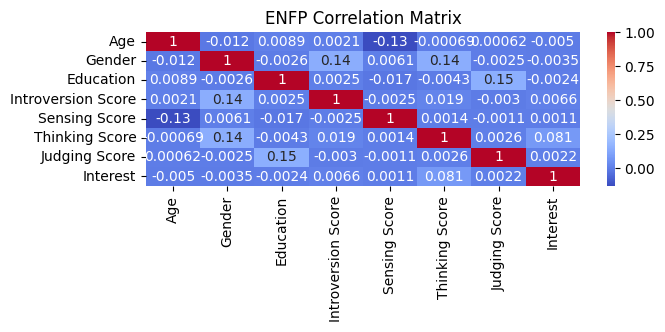




ESFP Minimum correlation (excluding 1): -0.036306130970523015
ESFP Maximum correlation (excluding 1): 0.14712570599768016


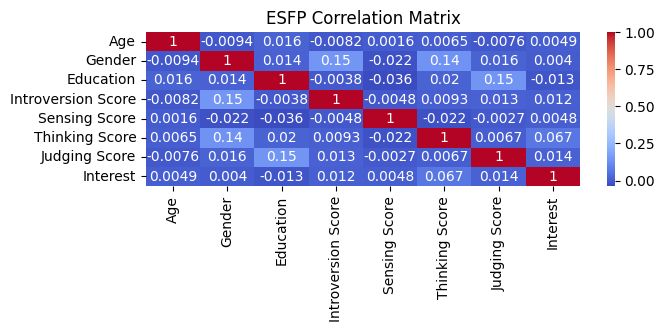




INTP Minimum correlation (excluding 1): -0.13174969123843044
INTP Maximum correlation (excluding 1): 0.19185996973314157


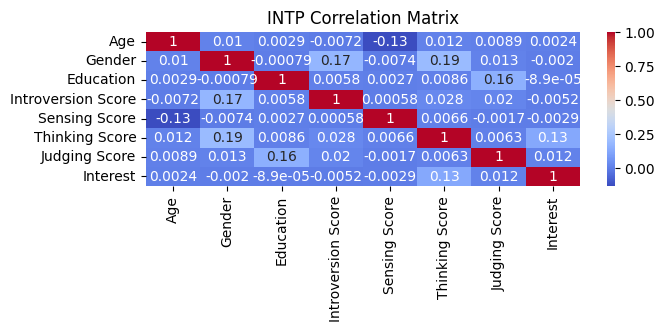




INFP Minimum correlation (excluding 1): -0.11917104186848852
INFP Maximum correlation (excluding 1): 0.17218117631635943


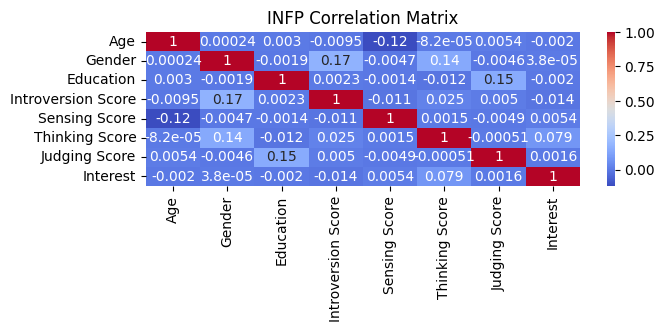




ENFJ Minimum correlation (excluding 1): -0.10995802039885555
ENFJ Maximum correlation (excluding 1): 0.16468214555230043


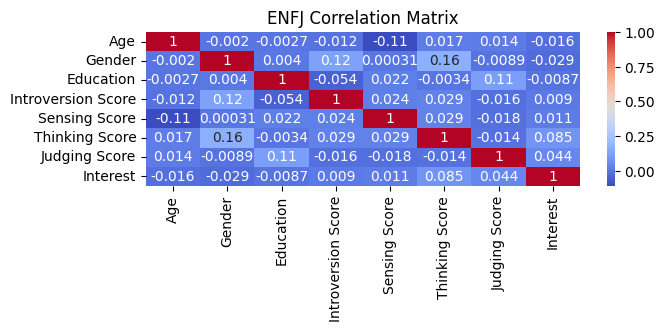




ENTP Minimum correlation (excluding 1): -0.13388687685952252
ENTP Maximum correlation (excluding 1): 0.20253724925749564


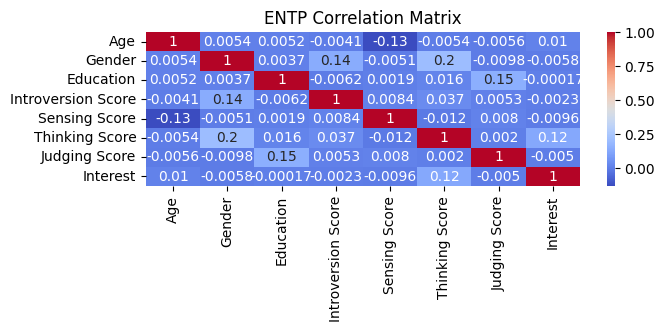




ESTP Minimum correlation (excluding 1): -0.021917516354328544
ESTP Maximum correlation (excluding 1): 0.19509145808396694


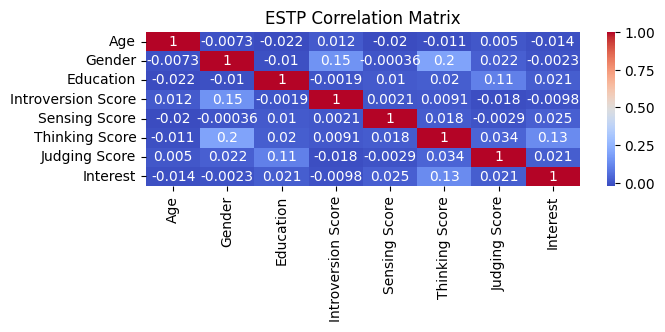




ISTP Minimum correlation (excluding 1): -0.045946839659795354
ISTP Maximum correlation (excluding 1): 0.19127296088344325


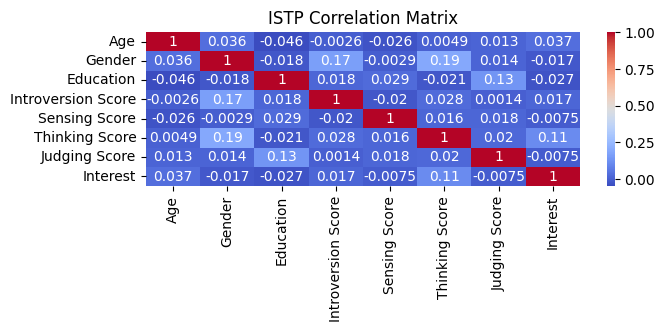




INTJ Minimum correlation (excluding 1): -0.10811347660893704
INTJ Maximum correlation (excluding 1): 0.20333128737026046


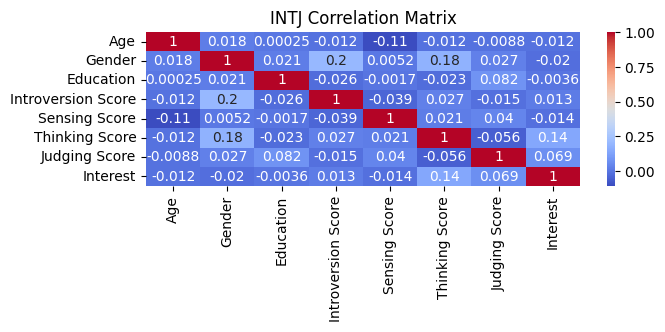




INFJ Minimum correlation (excluding 1): -0.12131577598865165
INFJ Maximum correlation (excluding 1): 0.1527507244453354


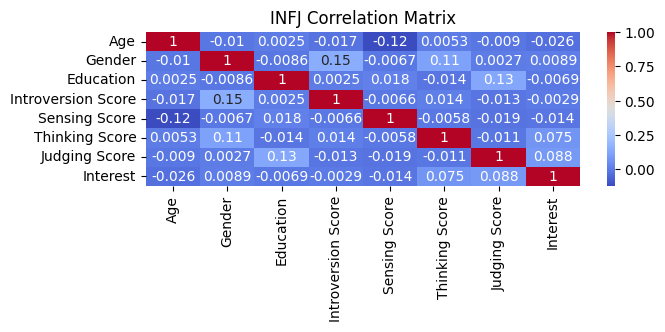




ISFP Minimum correlation (excluding 1): -0.03628936931570714
ISFP Maximum correlation (excluding 1): 0.15004143746944784


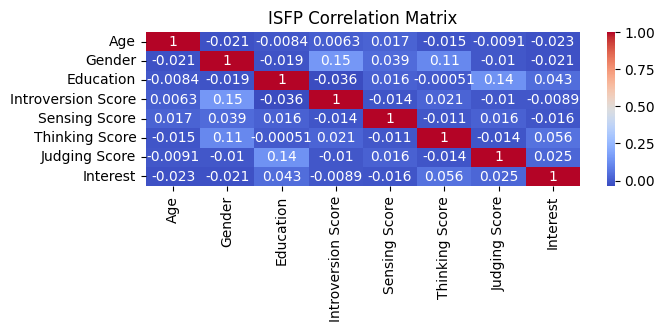




ENTJ Minimum correlation (excluding 1): -0.11677099208598714
ENTJ Maximum correlation (excluding 1): 0.2115055192387187


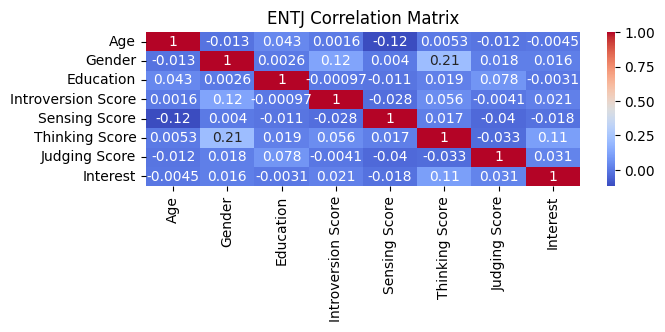




ESFJ Minimum correlation (excluding 1): -0.11592530335790441
ESFJ Maximum correlation (excluding 1): 0.2353892708157407


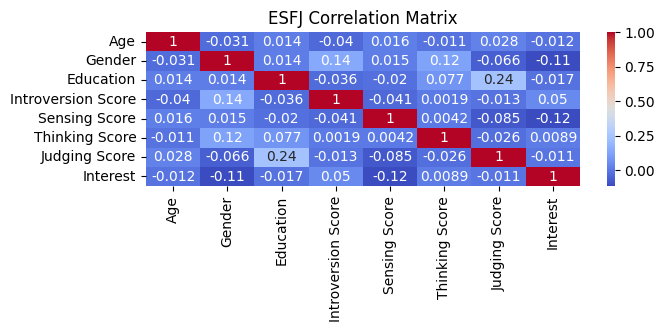




ISFJ Minimum correlation (excluding 1): -0.10862118202252671
ISFJ Maximum correlation (excluding 1): 0.18091412054281397


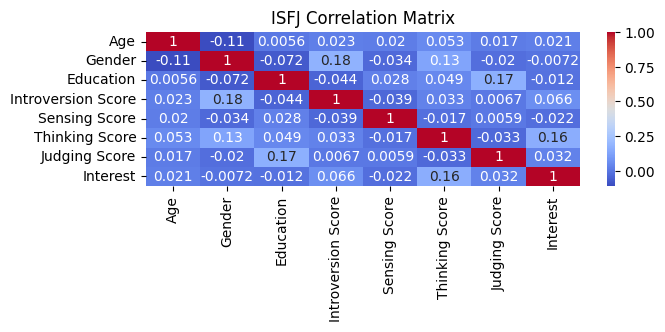




ISTJ Minimum correlation (excluding 1): -0.12391592234654468
ISTJ Maximum correlation (excluding 1): 0.35246992485768563


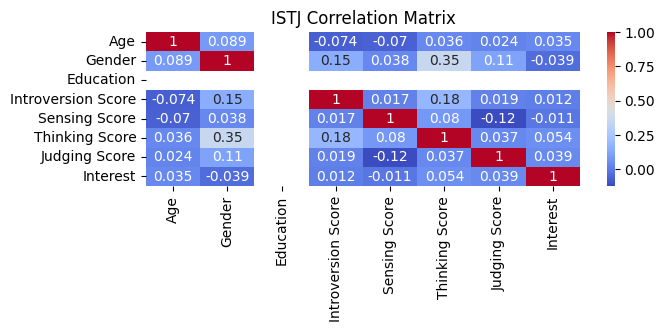




ESTJ Minimum correlation (excluding 1): -0.11394739270042667
ESTJ Maximum correlation (excluding 1): 0.18115525715847042


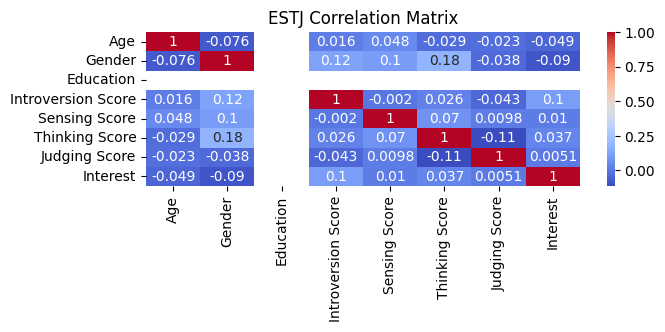

In [ ]:
for person in new_df["Personality"].unique():
  person_df = new_df[new_df["Personality"] == person]
  corr_matrix = person_df.drop("Personality",axis=1).corr()
  corr_matrix_no_diag = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))
  # Find the minimum and maximum values excluding NaN
  min_val = np.nanmin(corr_matrix_no_diag)
  max_val = np.nanmax(corr_matrix_no_diag)
  print("\n\n")
  print(f"{person} Minimum correlation (excluding 1): {min_val}")
  print(f"{person} Maximum correlation (excluding 1): {max_val}")
  plt.figure(figsize=(7, 2))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title(f'{person} Correlation Matrix')
  plt.show()

## **วนลูป แสดง Correlation Matrix ของแต่ละ Interest**




Unknown Minimum correlation (excluding 1): -0.006562526551924342
Unknown Maximum correlation (excluding 1): 0.013189156827688156


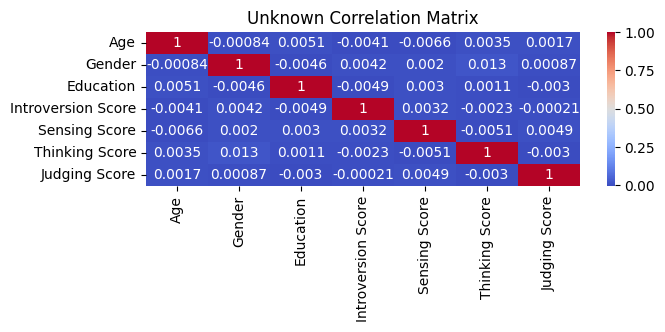




Sports Minimum correlation (excluding 1): -0.013345221631086054
Sports Maximum correlation (excluding 1): 0.013038106032291732


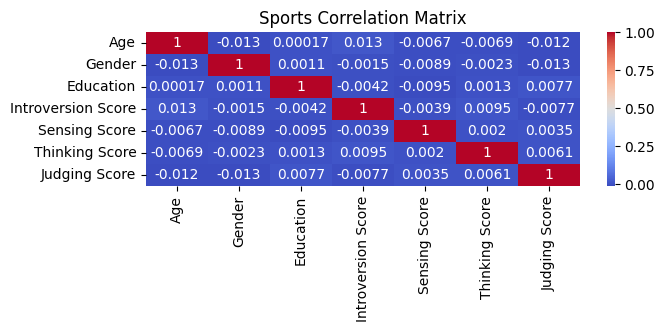




Others Minimum correlation (excluding 1): -0.0155173182988244
Others Maximum correlation (excluding 1): 0.007296495404323174


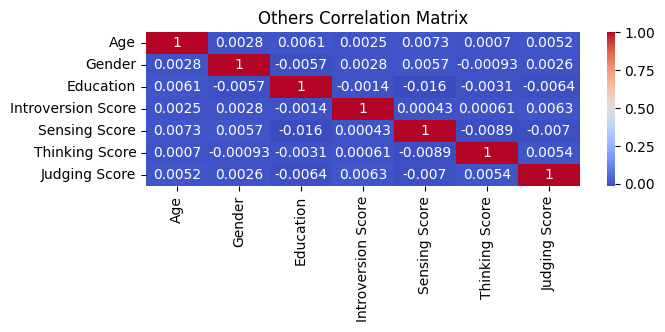




Technology Minimum correlation (excluding 1): -0.00802776926430442
Technology Maximum correlation (excluding 1): 0.01303334572288973


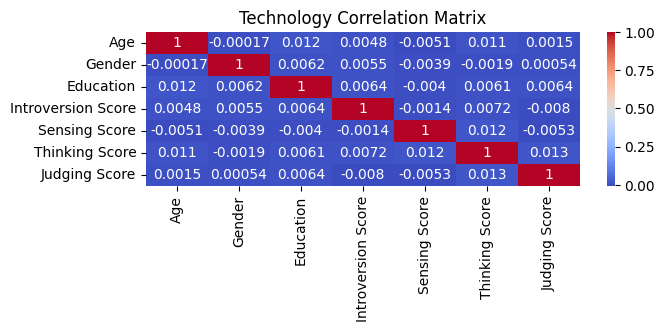




Arts Minimum correlation (excluding 1): -0.010628305743039631
Arts Maximum correlation (excluding 1): 0.009100468842967536


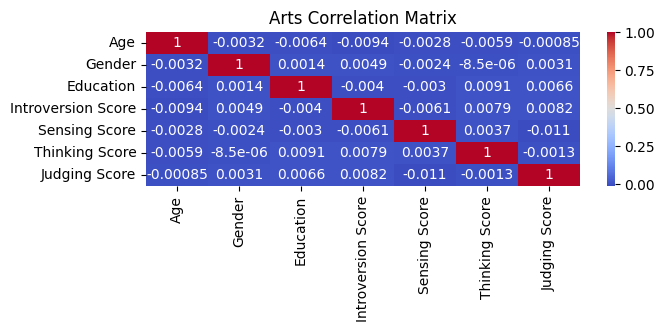

In [ ]:
interest = label_encoders['Interest'].classes_
for person in df["Interest"].unique():
  person_df = df[df["Interest"] == person].drop("Interest",axis=1)
  corr_matrix = person_df.drop("Personality",axis=1).corr()
  corr_matrix_no_diag = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))
  # Find the minimum and maximum values excluding NaN
  min_val = np.nanmin(corr_matrix_no_diag)
  max_val = np.nanmax(corr_matrix_no_diag)
  print("\n\n")
  print(f"{interest[person]} Minimum correlation (excluding 1): {min_val}")
  print(f"{interest[person]} Maximum correlation (excluding 1): {max_val}")
  plt.figure(figsize=(7, 2))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title(f'{interest[person]} Correlation Matrix')
  plt.show()

## **วนลูป แสดง Correlation Matrix ของแต่ละ Gender**




Male Minimum correlation (excluding 1): -0.008529398936393531
Male Maximum correlation (excluding 1): 0.009441150408096509


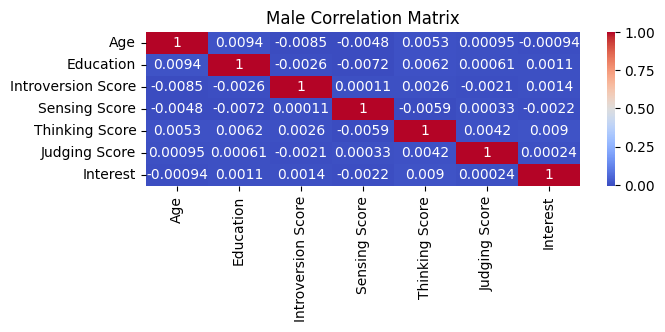




Female Minimum correlation (excluding 1): -0.004564479831421532
Female Maximum correlation (excluding 1): 0.008299675533309353


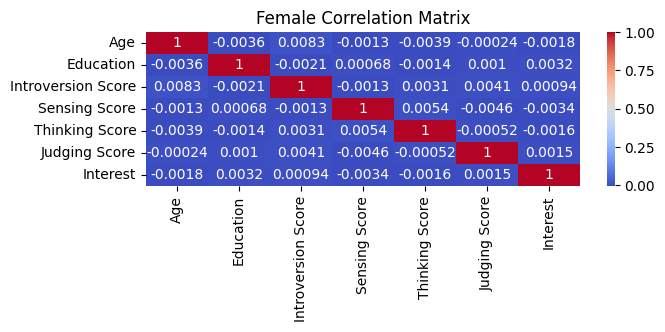

In [ ]:
gend = label_encoders['Gender'].classes_
for person in df["Gender"].unique():
  person_df = df[df["Gender"] == person].drop("Gender",axis=1)
  corr_matrix = person_df.drop("Personality",axis=1).corr()
  corr_matrix_no_diag = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))
  # Find the minimum and maximum values excluding NaN
  min_val = np.nanmin(corr_matrix_no_diag)
  max_val = np.nanmax(corr_matrix_no_diag)
  print("\n\n")
  print(f"{gend[person]} Minimum correlation (excluding 1): {min_val}")
  print(f"{gend[person]} Maximum correlation (excluding 1): {max_val}")
  plt.figure(figsize=(7, 2))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title(f'{gend[person]} Correlation Matrix')
  plt.show()